In [97]:
#
# How to use your trained model - Deep Learning basics with Python, TensorFlow and Keras
# Steg 6 - Skall nu använda modellen för att uppskatta om det är Katt eller Hund på bilden
#

In [98]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt      # för att visualisera data
import tensorflow as tf


In [99]:
#
# Bildmtrl för Test av modell, en katt och en hund
# bilder som inte existerar i träningsmaterialet
# Läses in från disk 

DATADIR = ".\\"                                   # path till katalog där jupyter notebook körs
DATADIR_MOD = DATADIR                             # path till sparad modell

TxT_MODEL_fName = DATADIR_MOD + 'CNN-softmax-4_level_conv-15_epoch.keras'

DATADIR_TEST_CAT = DATADIR                        # path till sparad Katt bild att testa modell
DATADIR_TEST_DOG = DATADIR                        # path till sparad Hund

TxT_fName_Cat = DATADIR_TEST_CAT + "cat.jpg"      # Foto med katt 
TxT_fName_Dog = DATADIR_TEST_DOG + "dog.jpg"      # Foto med hund


print(f"  {TxT_fName_Cat  =  }")
print(f"  {TxT_fName_Dog  =  }")
print(f"  {TxT_MODEL_fName  =  }")




  TxT_fName_Cat  =  '.\\cat.jpg'
  TxT_fName_Dog  =  '.\\dog.jpg'
  TxT_MODEL_fName  =  '.\\CNN-softmax-4_level_conv-15_epoch.keras'


In [100]:


CATEGORIES = ["Cat", "Dog"]         # Viktigt med ordningen: "Katter" : 0  &  "Hundar" : 1


def prepare_the_image(filepath):
    print(f"{filepath = }")
    IMG_SIZE = 75
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.subplot(1,2,1)
    plt.imshow(img_array, cmap="grey")
    plt.title(f"{img_array.size = }")
    plt.subplot(1,2,2)
    plt.imshow(new_array, cmap="grey")
    plt.title(f"{new_array.size = }")
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [101]:

# Hämta upp aktuell modell

model = tf.keras.models.load_model(TxT_MODEL_fName)


In [102]:
# returnerar AI-modellens classindelade svar

class_names = CATEGORIES

def print_the_response(from_prediction):
    predicted_label = class_names[np.argmax(from_prediction[0])]
    print(f"CNN modellklassning av Bild på Katt/Hund: {predicted_label = }")
    
    print(f"     predicted possibility to be a Cat ->  {round((from_prediction[0][0])*1000)/10} %")
    print(f"     predicted possibility to be a Dog ->  {round((from_prediction[0][1])*1000)/10} %")
    return predicted_label



filepath = '.\\cat.jpg'


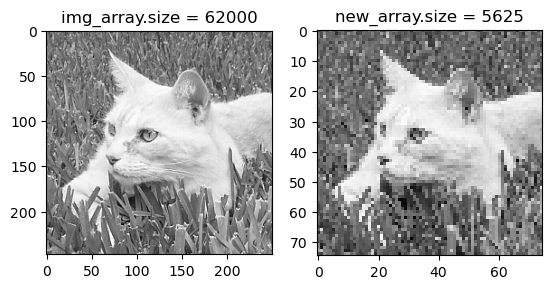

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
CNN modellklassning av Bild på Katt/Hund: predicted_label = 'Cat'
     predicted possibility to be a Cat ->  88.9 %
     predicted possibility to be a Dog ->  11.1 %


In [103]:
# Test av modell med en bild på katt
#

pic_array = prepare_the_image(TxT_fName_Cat)
normed_pic_array = pic_array/255.0              # Normera gråskallenivå, (0,255) transformeras till (0,1), utan medlevärdesförskjutning
prediction = model.predict(normed_pic_array)

ans = print_the_response(prediction)



filepath = '.\\dog.jpg'


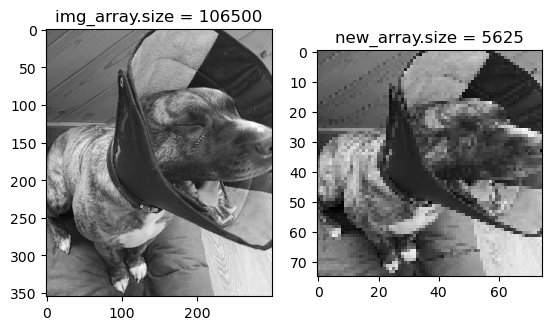

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
CNN modellklassning av Bild på Katt/Hund: predicted_label = 'Dog'
     predicted possibility to be a Cat ->  7.7 %
     predicted possibility to be a Dog ->  92.3 %


In [104]:
# Test av modell med en bild på Hund
#

pic_array = prepare_the_image(TxT_fName_Dog)
normed_pic_array = pic_array/255.0              # Normera gråskallenivå, (0,255) transformeras till (0,1), utan medlevärdesförskjutning

ans = print_the_response(model.predict([normed_pic_array]))
